Чернышова Дана Кирилловна
MLT task 1

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('bioresponse.csv')
X = data.drop('Activity', axis=1)  # features
y = data['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
small_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
deep_tree = DecisionTreeClassifier(max_depth=20, random_state=42)

rf_small_trees = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
rf_deep_trees = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42)

models = {
    "Small Decision Tree": small_tree,
    "Deep Decision Tree": deep_tree,
    "Random Forest on Small Trees": rf_small_trees,
    "Random Forest on Deep Trees": rf_deep_trees
}

for name, model in models.items():
    model.fit(X_train, y_train)

                              precision    recall  accuracy  f1 score  \
Small Decision Tree            0.785321  0.800000  0.761194  0.792593   
Deep Decision Tree             0.751908  0.736449  0.711087  0.744098   
Random Forest on Small Trees   0.770833  0.760748  0.734542  0.765757   
Random Forest on Deep Trees    0.832714  0.837383  0.811301  0.835042   

                              log loss  
Small Decision Tree           0.540199  
Deep Decision Tree            9.419967  
Random Forest on Small Trees  0.588768  
Random Forest on Deep Trees   0.458308  


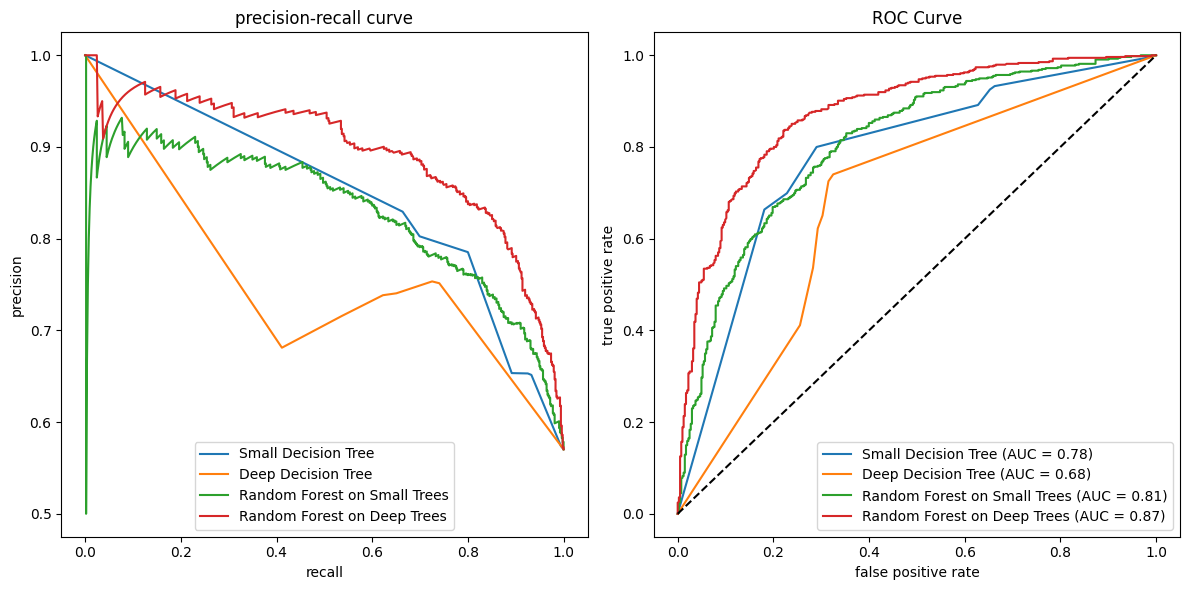

In [15]:
metrics = {} # calc the metrics for each model

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # for log-loss and ROC

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_prob)

    metrics[name] = {
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'f1 score': f1,
        'log loss': logloss
    }

print(pd.DataFrame(metrics).T)

plt.figure(figsize=(12, 6))

# precision-recall
plt.subplot(1, 2, 1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=name)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision-recall curve')
plt.legend()

# ROC
plt.subplot(1, 2, 2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()

rf_high_recall = RandomForestClassifier(max_depth=20, n_estimators=100, class_weight='balanced', random_state=42)
rf_high_recall.fit(X_train, y_train)

# adj threshold to get recall > 0.95
y_prob = rf_high_recall.predict_proba(X_test)[:, 1]
threshold = 0.2
y_pred_high_recall = (y_prob >= threshold).astype(int)

# calc metrics once more
precision = precision_score(y_test, y_pred_high_recall)
recall = recall_score(y_test, y_pred_high_recall)
accuracy = accuracy_score(y_test, y_pred_high_recall)
f1 = f1_score(y_test, y_pred_high_recall)
logloss = log_loss(y_test, y_prob)


In [16]:
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"accuracy: {accuracy:.4f}")
print(f"f1: {f1:.4f}")
print(f"log loss: {logloss:.4f}")

precision: 0.6343
recall: 0.9888
accuracy: 0.6684
f1: 0.7728
log loss: 0.4572
